In [49]:
import pandas as pd
import umap
from matplotlib import pyplot as plt
import numpy as np
from sklearn import cluster, decomposition
from tqdm.notebook import tqdm

In [55]:
df=pd.read_csv('Wenu.csv')
df['type']=df['type'].map(lambda x: 0 if x=="EB" else 1)

del df['Run']
del df['Event']

In [56]:
df

,pt,eta,phi,Q,type,delEta,delPhi,sigmaEtaEta,HoverE,isoTrack,isoEcal,isoHcal,MET,phiMET
0,38.6387,-0.8499,1.8486,-1,0,0,0,0.0095,0.0000,0.0000,1.2241,0.0000,46.7884,-1.3886
1,59.1666,-2.1095,-2.5163,1,1,0,0,0.0214,0.0177,20.4771,2.5441,6.7450,15.0179,1.1503
2,31.7262,2.4504,2.8956,1,1,0,0,0.0288,0.0000,0.7775,1.8222,0.3663,20.6550,-0.2703
3,73.4109,-1.3951,2.0052,-1,0,0,0,0.0100,0.0000,22.8584,8.0151,8.2951,3.2858,-0.7739
4,49.1363,-2.4326,3.0219,1,1,0,0,0.0271,0.0000,0.0000,0.1154,0.0000,3.1425,2.5081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,36.3273,1.6702,1.2661,1,1,0,0,0.0121,0.0000,4.7671,6.1986,1.8196,15.3664,-2.3175
99996,36.4311,2.3350,2.8727,1,1,0,0,0.0237,0.0093,0.0000,0.1222,1.9814,34.3963,-0.4803
99997,34.5445,0.7553,2.1770,1,0,0,0,0.0102,0.0000,0.0000,2.5059,0.0000,12.3106,-2.5193
99998,33.4814,0.1337,-2.8657,1,0,0,0,0.0101,0.0000,0.0000,7.3592,2.9567,10.2745,-2.0504


In [19]:
reducer=umap.UMAP(n_components=2)

reduced_data=reducer.fit_transform(df)

In [39]:
kmeans = cluster.KMeans(n_clusters=2, n_init="auto").fit(df)


  0%|          | 0/19 [00:00<?, ?it/s]

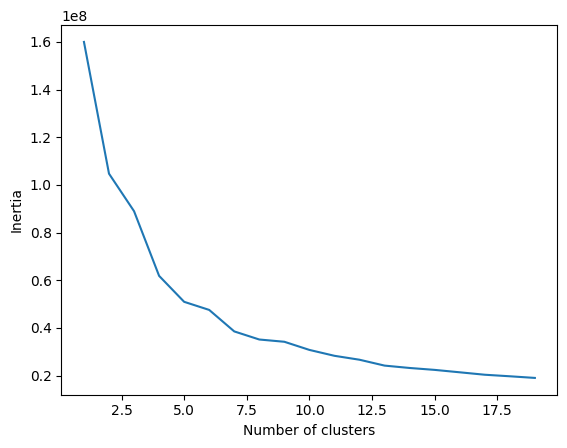

In [65]:
inertias=[]
for i in tqdm(range(1,20)):
    kmeans = cluster.KMeans(n_clusters=i, n_init="auto").fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,20),inertias )
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

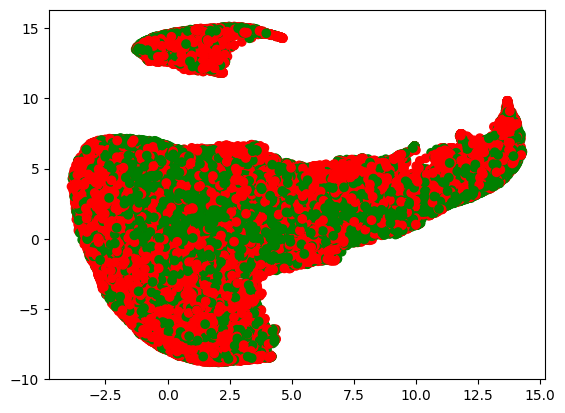

In [63]:
colors_c=['red', 'green','yellow']
# x_k=df['Q']
x_k=df['type']
# x_k=kmeans.labels_
colors_c=[ colors_c[i] for i in x_k]

plt.scatter(reduced_data[:,0],reduced_data[:,1], color=colors_c)
plt.show()

In [44]:
pca = decomposition.PCA(n_components=2)
reduced_pca=pca.fit_transform(df)


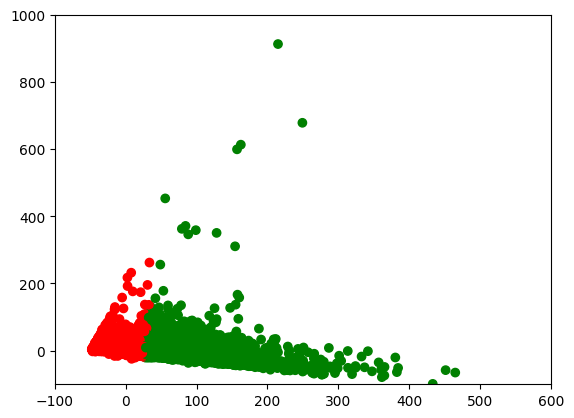

In [47]:
colors_c=['red', 'green','yellow']
# x_k=df['Q']
x_k=kmeans.labels_
colors_c=[ colors_c[i] for i in x_k]

plt.scatter(reduced_pca[:,0],reduced_pca[:,1], color=colors_c)
plt.ylim(-100,1000)
plt.xlim(-100,600)
plt.show()

In [ ]:
kmeans = cluster.KMeans(n_clusters=2, n_init="auto").fit(df)
